In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('Country-data.csv')
df.head()

,Country,Child_Mort,Exports,Health,Imports,Income,Inflation,Life_Expec,Total_Fer,GDPP
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:,1:9])

In [8]:
df_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  0.15733622,
        -1.61909203,  1.90288227],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.31234747,
         0.64786643, -0.85997281],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.78927429,
         0.67042323, -0.0384044 ],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.40973191,
         0.28695762, -0.66120626],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  1.50091625,
        -0.34463279,  1.14094382],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  0.59001454,
        -2.09278484,  1.6246091 ]])

In [48]:
k=4
km = KMeans(n_clusters=k,random_state=42)
clusters = km.fit_predict(df_scaled)

silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score for full dataset: {silhouette_avg}')


Silhouette Score for full dataset: 0.22926853160883937


In [49]:
silhouette_scores = []
for i in range(df_scaled.shape[1]):
    df_subset = np.delete(df_scaled,i,axis=1)

    clusters = km.fit_predict(df_subset)
    silhouette_avg = silhouette_score(df_subset,clusters)
    silhouette_scores.append((i,silhouette_avg))



In [50]:
silo_scores = pd.DataFrame(data=silhouette_scores,columns=["Feature_Index", "Silhouette_Score"])

In [72]:
import statistics 

In [75]:
variance_features =[]
for i in df.iloc[:,1:10].columns:
    var = round(df[i].std(),2)
    mean = round(df[i].mean(),2)
    mode = statistics.mode(df[i])
    variance_features.append((i,var,mean,mode))
variance_features
variance_features = pd.DataFrame(variance_features,columns=['columns','std','mean','mode'])    


In [76]:
variance_features

,columns,std,mean,mode
0,Child_Mort,40.33,38.27,4.50
1,Exports,27.41,41.11,35.00
2,Health,2.75,6.82,5.20
3,Imports,24.21,46.89,58.90
4,Income,19278.07,17144.69,41100.00
5,Inflation,10.57,7.78,16.60
6,Life_Expec,8.89,70.56,76.30
7,Total_Fer,1.51,2.95,1.92
8,GDPP,18328.70,12964.16,1310.00


In [51]:
silo_scores

,Feature_Index,Silhouette_Score
0,0,0.238385
1,1,0.246606
2,2,0.211312
3,3,0.279964
4,4,0.221434
5,5,0.312824
6,6,0.295825
7,7,0.215916


<Axes: xlabel='Feature_Index', ylabel='Silhouette_Score'>

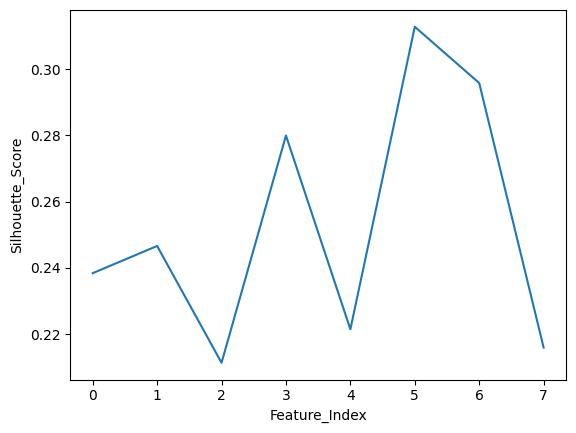

In [52]:
sns.lineplot(data=silo_scores,x='Feature_Index',y='Silhouette_Score')

<Axes: >

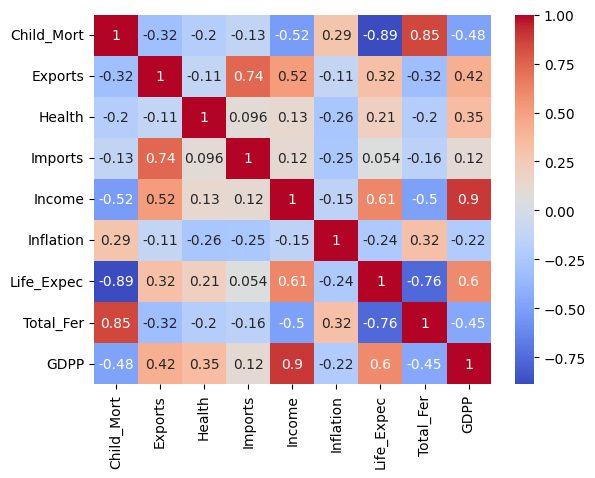

In [53]:
sns.heatmap(df.iloc[:,1:10].corr(),cmap='coolwarm',annot=True)

##### afer running features analysis wa can see that some features have low variance meaning that they have low inpact on the clustring :
* so we are going to drop Total_fer,health

In [77]:
df.drop(['Health','Total_Fer'],axis=1,inplace=True)
df.head()

,Country,Child_Mort,Exports,Imports,Income,Inflation,Life_Expec,GDPP
0,Afghanistan,90.2,10.0,44.9,1610,9.44,56.2,553
1,Albania,16.6,28.0,48.6,9930,4.49,76.3,4090
2,Algeria,27.3,38.4,31.4,12900,16.10,76.5,4460
3,Angola,119.0,62.3,42.9,5900,22.40,60.1,3530
4,Antigua and Barbuda,10.3,45.5,58.9,19100,1.44,76.8,12200


In [79]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:,1:7])
print(df_scaled)

[[ 1.29153238 -1.13827979 -0.08245496 -0.8082454   0.15733622 -1.61909203]
 [-0.5389489  -0.47965843  0.07083669 -0.3753689  -0.31234747  0.64786643]
 [-0.27283273 -0.09912164 -0.64176233 -0.22084447  0.78927429  0.67042323]
 ...
 [-0.37231541  1.13030491  1.38003025 -0.65840354  0.40973191  0.28695762]
 [ 0.44841668 -0.40647827 -0.5174718  -0.65892382  1.50091625 -0.34463279]
 [ 1.11495062 -0.15034774 -0.66247742 -0.72135793  0.59001454 -2.09278484]]


In [88]:

wcss = []
for i in range(1,11) :
    Kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    Kmeans.fit(df_scaled)
    wcss.append((Kmeans.inertia_,i)) 

<Axes: xlabel='k', ylabel='inertia'>

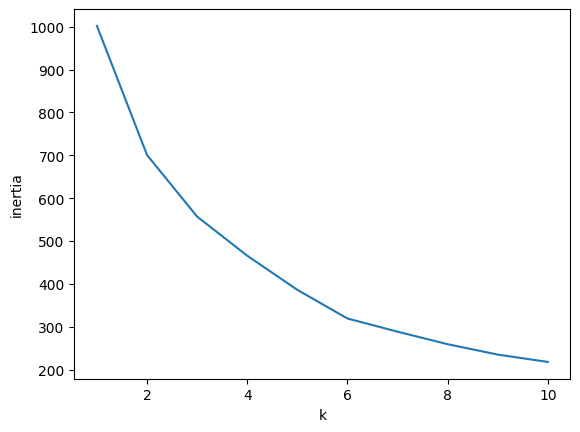

In [87]:
wcss = pd.DataFrame(wcss,columns=['inertia','k'])
sns.lineplot(data=wcss,x='k',y='inertia')

In [89]:
Kmeans = KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans =Kmeans.fit_predict(df_scaled)
y_kmeans

array([1, 5, 3, 1, 5, 3, 3, 0, 0, 3, 5, 0, 3, 5, 5, 0, 5, 1, 5, 3, 5, 1,
       3, 0, 5, 1, 1, 5, 1, 0, 5, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 5, 0, 5,
       0, 3, 3, 3, 5, 1, 3, 5, 5, 0, 0, 3, 1, 5, 0, 1, 0, 5, 3, 1, 1, 5,
       1, 5, 0, 3, 3, 3, 3, 0, 0, 0, 5, 0, 5, 3, 1, 1, 0, 5, 1, 5, 5, 1,
       1, 0, 5, 2, 5, 1, 1, 5, 5, 1, 2, 1, 5, 5, 5, 3, 5, 5, 1, 3, 1, 3,
       0, 0, 1, 4, 0, 0, 1, 5, 5, 3, 3, 5, 0, 0, 5, 3, 1, 5, 0, 1, 5, 5,
       1, 2, 5, 5, 5, 1, 0, 0, 3, 5, 3, 5, 0, 0, 3, 1, 5, 3, 1, 5, 5, 3,
       5, 1, 5, 0, 0, 0, 3, 3, 5, 3, 5, 3, 1])

In [90]:
df['cluster'] = y_kmeans

In [91]:
df

,Country,Child_Mort,Exports,Imports,Income,Inflation,Life_Expec,GDPP,cluster
0,Afghanistan,90.2,10.0,44.9,1610,9.44,56.2,553,1
1,Albania,16.6,28.0,48.6,9930,4.49,76.3,4090,5
2,Algeria,27.3,38.4,31.4,12900,16.10,76.5,4460,3
3,Angola,119.0,62.3,42.9,5900,22.40,60.1,3530,1
4,Antigua and Barbuda,10.3,45.5,58.9,19100,1.44,76.8,12200,5
...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,52.7,2950,2.62,63.0,2970,5
163,Venezuela,17.1,28.5,17.6,16500,45.90,75.4,13500,3
164,Vietnam,23.3,72.0,80.2,4490,12.10,73.1,1310,5
165,Yemen,56.3,30.0,34.4,4480,23.60,67.5,1310,3
